In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exercise 31
## a)
Fit a sixth degree polynomial to the data in the file ex_a.csv using the least squares method. State the resulting coefficients and plot the fitted polynomial and data.

In [2]:
data_a = pd.read_csv('ex_a.csv')

x = data_a['x'].values
y = data_a[' "y_0"'].values #warum macht man da ein Leerzeichen vor den Namen???!!!???!!!???!!!???!!!???!!!


def poly(n,x):
    return x**n

def poly6(x, a):
    return a[0] + a[1]*x + a[2]*x**2 + a[3]*x**3 + a[4]*x**4 + a[5]*x**5 + a[6]*x**6


# design matrix
A = np.array([poly(0,x), poly(1,x), poly(2,x), poly(3,x), poly(4,x), poly(5,x), poly(6,x)]).T

a = (np.linalg.inv(A.T@A)@A.T)@y

print('Coefficents: ', a)

Coefficents:  [ 2.50619533e-01 -5.78875871e-01  7.03767007e-01 -3.37061731e-01
  7.69042416e-02 -8.41974710e-03  3.55422916e-04]


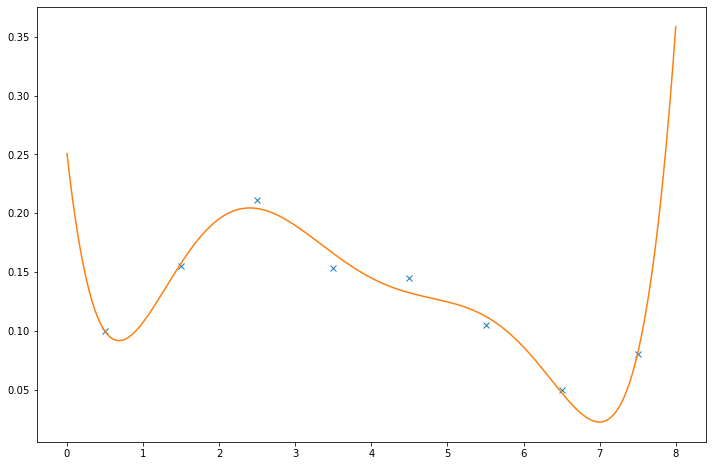

In [3]:
fig, ax = plt.subplots(figsize=(12,8))

xx = np.linspace(0,8,1000)

ax.plot(x,y,'x')
ax.plot(xx, poly6(xx,a))

## b)
Fit a sixth degree polynomial to the data in the file ex_a.csv using the least squares method and additionally use the regularization via the second derivative (𝛤 = √𝜆𝐶𝐴). For the regular- ization strength use 𝜆 ∈ (0.1, 0.3, 0.7, 3, 10). State the resulting coefficients and plot the fitted polynomial and the data.

In [4]:
lamda = np.array([0.1, 0.3, 0.7, 3, 10])
a_reg = np.ones((len(lamda),len(x)-1))

for i in range(len(lamda)):
    a_reg[i] = (np.linalg.inv(A.T@A + lamda[i]*np.identity(7)))@A.T@y
    print('a_reg(lamda = ', lamda[i], ') = ', a_reg[i], '\n')


a_reg(lamda =  0.1 ) =  [ 6.06641331e-02  5.88830168e-02  3.64164352e-02 -2.99383828e-02
  7.59920585e-03 -8.95932826e-04  4.14410536e-05] 

a_reg(lamda =  0.3 ) =  [ 6.02216052e-02  5.05329381e-02  2.74505145e-02 -1.73629747e-02
  3.17712586e-03 -2.78551109e-04  1.11149895e-05] 

a_reg(lamda =  0.7 ) =  [ 5.33091244e-02  4.20662864e-02  2.37717537e-02 -7.79840568e-03
 -5.44205246e-04  2.63821398e-04 -1.61604395e-05] 

a_reg(lamda =  3.0 ) =  [ 3.10639017e-02  2.65519311e-02  2.08925045e-02  6.57764356e-03
 -6.23978256e-03  1.08604188e-03 -5.69246577e-05] 

a_reg(lamda =  10.0 ) =  [ 1.57839138e-02  1.62413774e-02  1.71388028e-02  1.11822148e-02
 -6.96225370e-03  1.07543880e-03 -5.18642798e-05] 



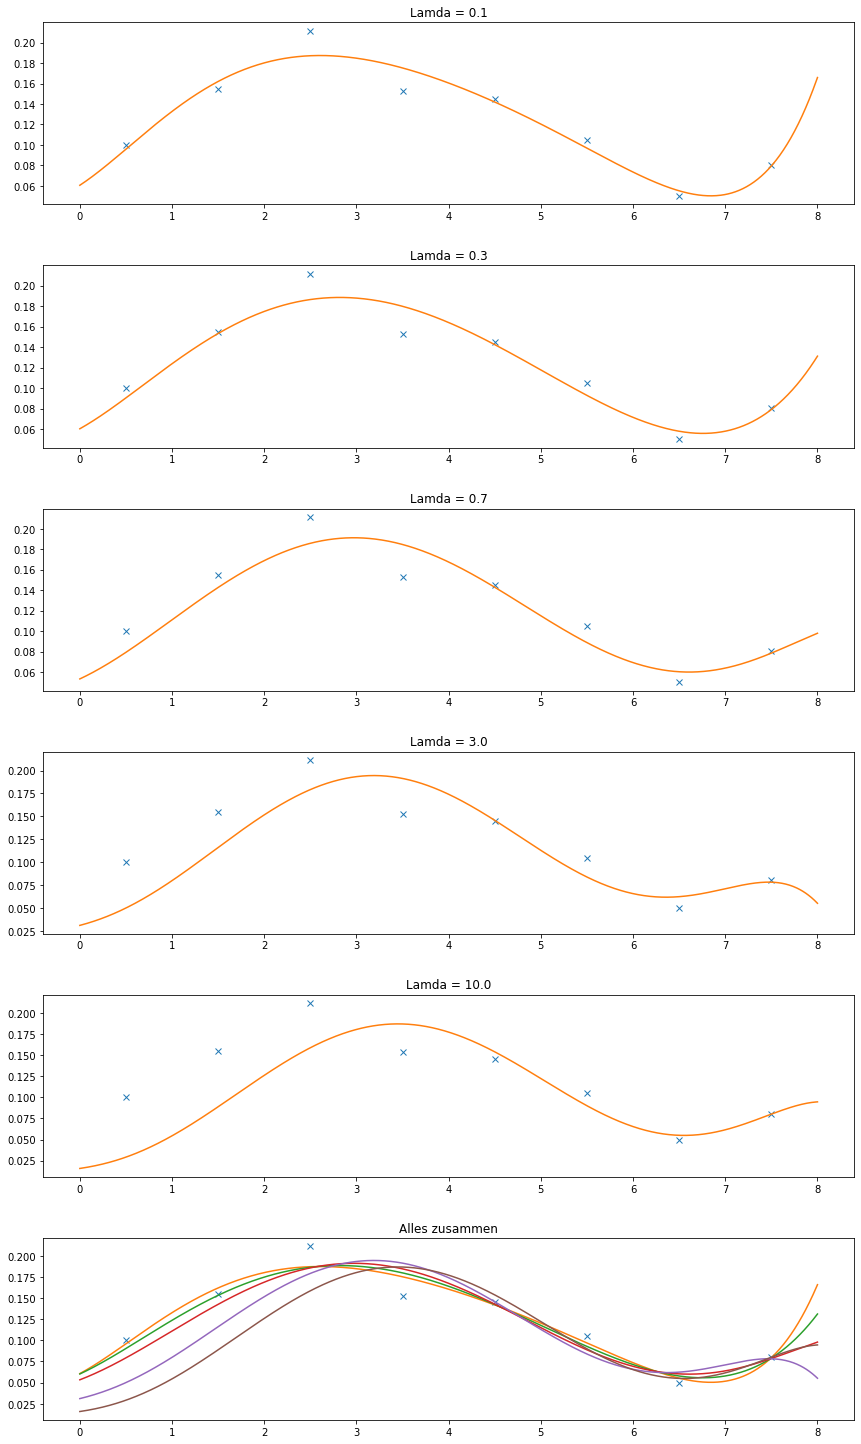

In [5]:
xx = np.linspace(0,8,1000)

fig, ax = plt.subplots(6, figsize=(12,20))
fig.tight_layout(h_pad = 4)

ax[5].plot(x,y,'x')
ax[5].set_title('Alles zusammen')

for i in range(len(lamda)):
    ax[i].set_title(f'Lamda = {lamda[i]}')
    ax[i].plot(x,y,'x')
    ax[i].plot(xx, poly6(xx,a_reg[i]))    
    ax[5].plot(xx, poly6(xx,a_reg[i]))


Für größere Lamdas wird der Fit in diesem Fall zunehmend schlechter.

## c)
Fit a sixth degree polynomial to the mean values of the data from the file ex_c.csv using the least squares method. Weight the calculated means with the uncertainty of the mean. Use these weights when fitting. Plot the fitted polynomial and the averaged data.

In [6]:
data_c = pd.read_csv('ex_c.csv')
x = data_c['x'].values

# calculating mean and std of y_i
data_c['mean'] = data_c.iloc[:, 1:].mean(axis=1)
data_c['std'] = data_c.iloc[:, 1:].std(axis=1)

y = data_c['mean'].values
weights = data_c['std'].values

#weight matrix
w = np.linalg.inv(np.diag(weights**2))

# design matrix
A = np.array([poly(0,x), poly(1,x), poly(2,x), poly(3,x), poly(4,x), poly(5,x), poly(6,x)]).T

# ungewichtet
a_c = (np.linalg.inv(A.T@A)@A.T)@y

print('Koeffizienten ungewichtet: ', a_c, '\n')

# gewichtet
a_reg_c = (np.linalg.inv(A.T@w@A))@A.T@w@y
print('Koeffizienten gewichtet: ', a_reg_c)

Koeffizienten ungewichtet:  [ 1.26244798e-01 -9.53347441e-03  7.27981151e-02 -4.10586237e-02
  8.89661123e-03 -8.77219068e-04  3.31728749e-05] 

Koeffizienten gewichtet:  [ 1.17045448e-01  2.27045863e-02  3.76987928e-02 -2.43765150e-02
  5.04536510e-03 -4.52564195e-04  1.52620173e-05]


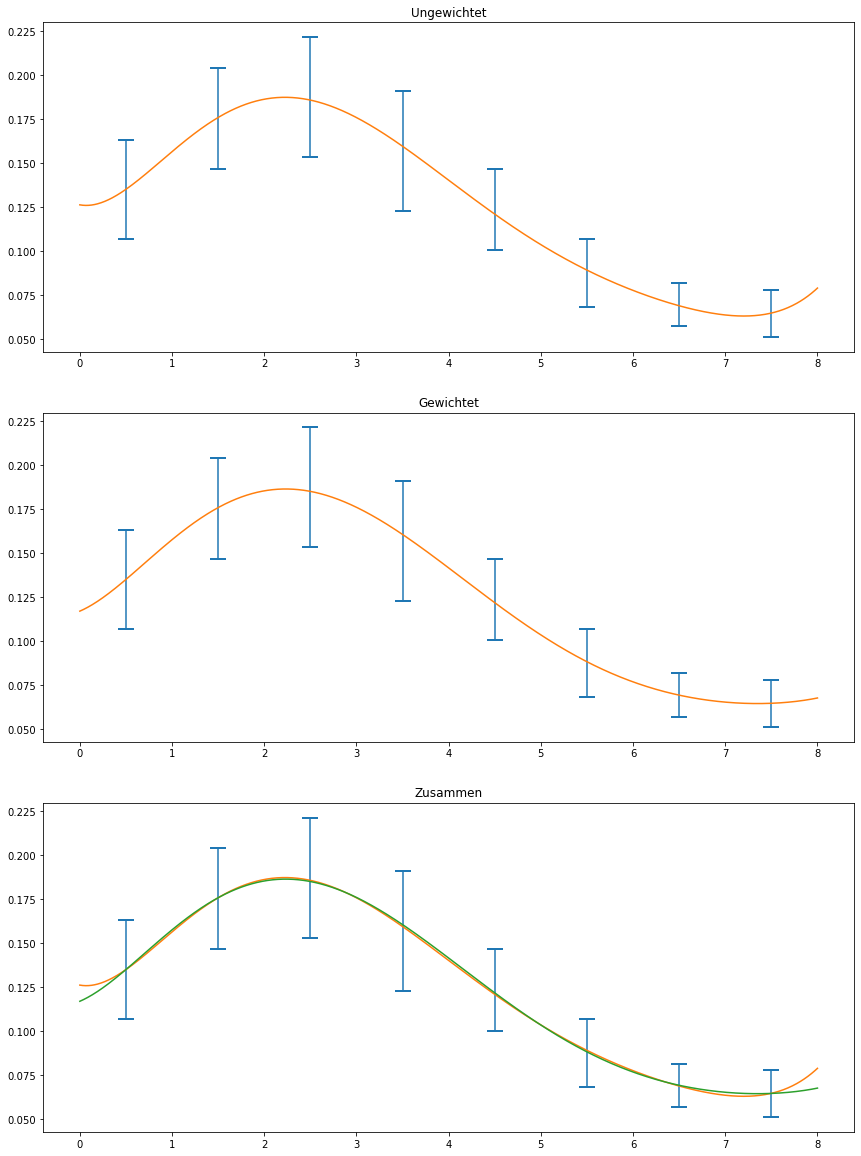

In [7]:
xx = np.linspace(0,8,1000)

fig, ax = plt.subplots(3, figsize=(12,16))
fig.tight_layout(h_pad = 4)

ax[0].set_title('Ungewichtet')
ax[0].errorbar(x,y,yerr=weights, capsize=8, lw=0, elinewidth=1.5, capthick=2)
ax[0].plot(xx, poly6(xx,a_c))

ax[1].set_title('Gewichtet')
ax[1].errorbar(x,y,yerr=weights, capsize=8, lw=0, elinewidth=1.5, capthick=2)
ax[1].plot(xx, poly6(xx,a_reg_c))

ax[2].set_title('Zusammen')
ax[2].errorbar(x,y,yerr=weights, capsize=8, lw=0, elinewidth=1.5, capthick=2)
ax[2].plot(xx, poly6(xx,a_c))
ax[2].plot(xx, poly6(xx,a_reg_c))

Mit dem größeren Datensatz verbessert sich auch der Fit. Werden dann auch noch die Standardabweichungen dazugenommen, wird der Fit nochmals besser.